# Project 10 - Case Study 10 - Amazon Forest Fire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df_amazon = pd.read_csv("./datasets/10_Case_10_amazon.csv", encoding="iso-8859-1", parse_dates=['date'])

In [13]:
df_amazon.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

## 1. Display Top 5 Rows of The Dataset

In [14]:
df_amazon.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


## 2. Check Last 5 Rows

In [15]:
df_amazon.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


## 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [16]:
print("Dataframe shape:", df_amazon.shape)
print("Rows:", df_amazon.shape[0])
print("Columns:", df_amazon.shape[1])

Dataframe shape: (6454, 5)
Rows: 6454
Columns: 5


## 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [17]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


## 5. Check For Duplicate Data and Drop Them

In [18]:
duplicates = df_amazon.duplicated().any()

In [19]:
print("Are there any duplicated values in the data?", duplicates)

Are there any duplicated values in the data? True


In [20]:
df_amazon = df_amazon.drop_duplicates()

In [21]:
df_amazon.shape

(6422, 5)

In [22]:
6454 - 6422

32

## 6. Check Null Values In The Dataset

In [23]:
df_amazon.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [24]:
df_amazon.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

## 7. Get Overall Statistics About The Dataframe

In [25]:
df_amazon.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


## 8. Rename Month Names To English

In [26]:
df_amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [27]:
# change all the portuguese months into english by mapping
df_amazon["month_eng"] = df_amazon["month"].map({'Janeiro':'jan',
                                                 'Fevereiro':'feb',
                                                 'Março':'march',
                                                 'Abril':'april',
                                                 'Maio':'may',
                                                 'Junho':'jun',
                                                 'Julho':'july',
                                                 'Agosto':'august',
                                                 'Setembro':'sep',
                                                 'Outubro':'oct',
                                                 'Novembro':'nov',
                                                 'Dezembro':'dec'})

In [29]:
df_amazon.tail()

,year,state,month,number,date,month_eng
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,dec
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,dec
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,dec
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,dec
6453,2016,Tocantins,Dezembro,119.0,2016-01-01,dec


## 9. Total Number of Fires Registered

In [30]:
df_amazon.shape

(6422, 6)

## 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [31]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [33]:
max_ff = df_amazon["number"].groupby(df_amazon["month_eng"]).sum().reset_index()

max_ff

,month_eng,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,march,30709.405
8,may,34725.363
9,nov,85508.054


<Axes: xlabel='month_eng', ylabel='number'>

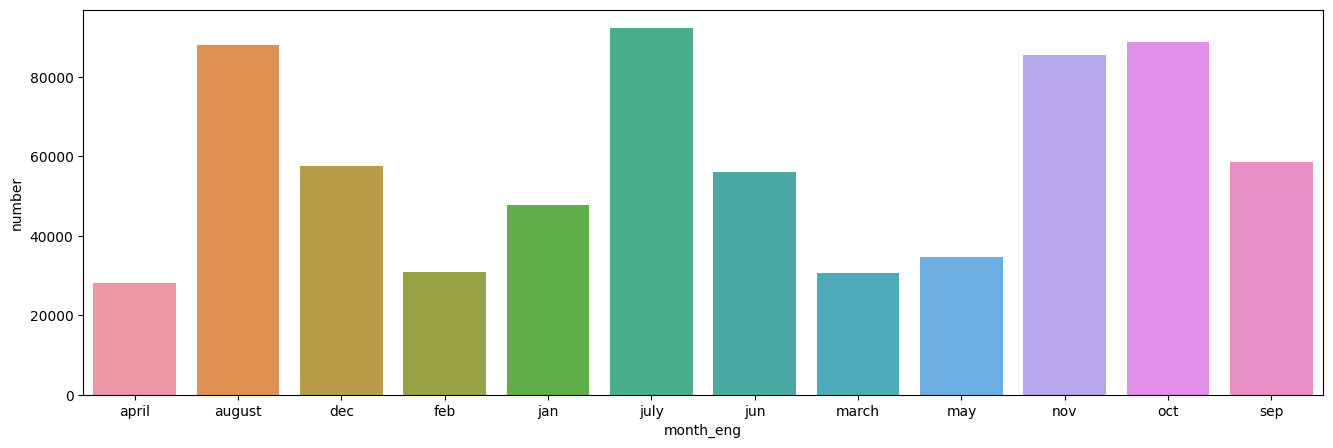

In [36]:
plt.figure(figsize=(16,5))
sns.barplot(x="month_eng", y="number", data=max_ff)

## 11. In Which Year Maximum Number of Forest Fires Was Reported?

In [37]:
max_ff_year = df_amazon.groupby("year")["number"].sum().reset_index()

max_ff_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

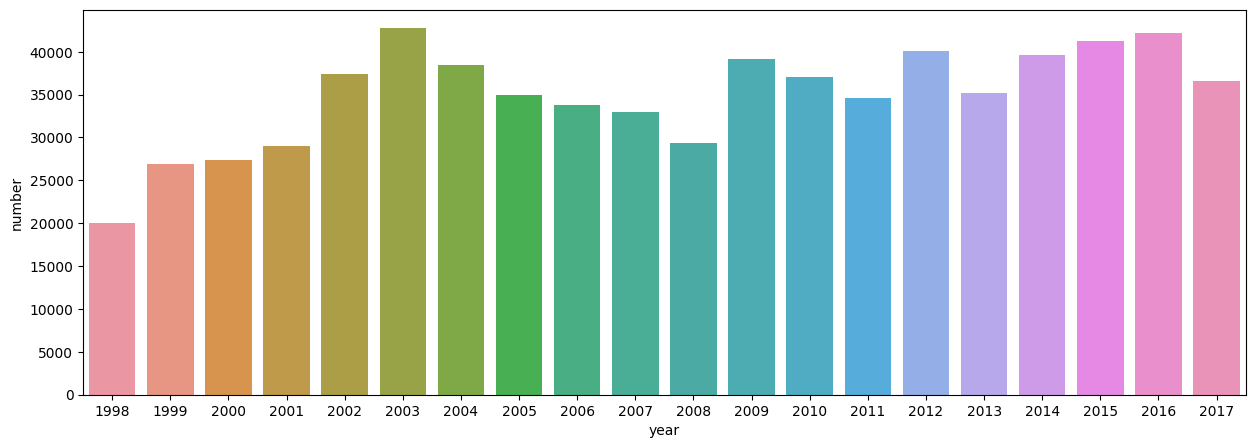

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x="year", y="number", data=max_ff_year)

## 12. In Which State Maximum Number of Forest Fires Was Reported?

In [41]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [42]:
max_ff_state = df_amazon.groupby("state")["number"].sum().reset_index()

max_ff_state

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='number', ylabel='state'>

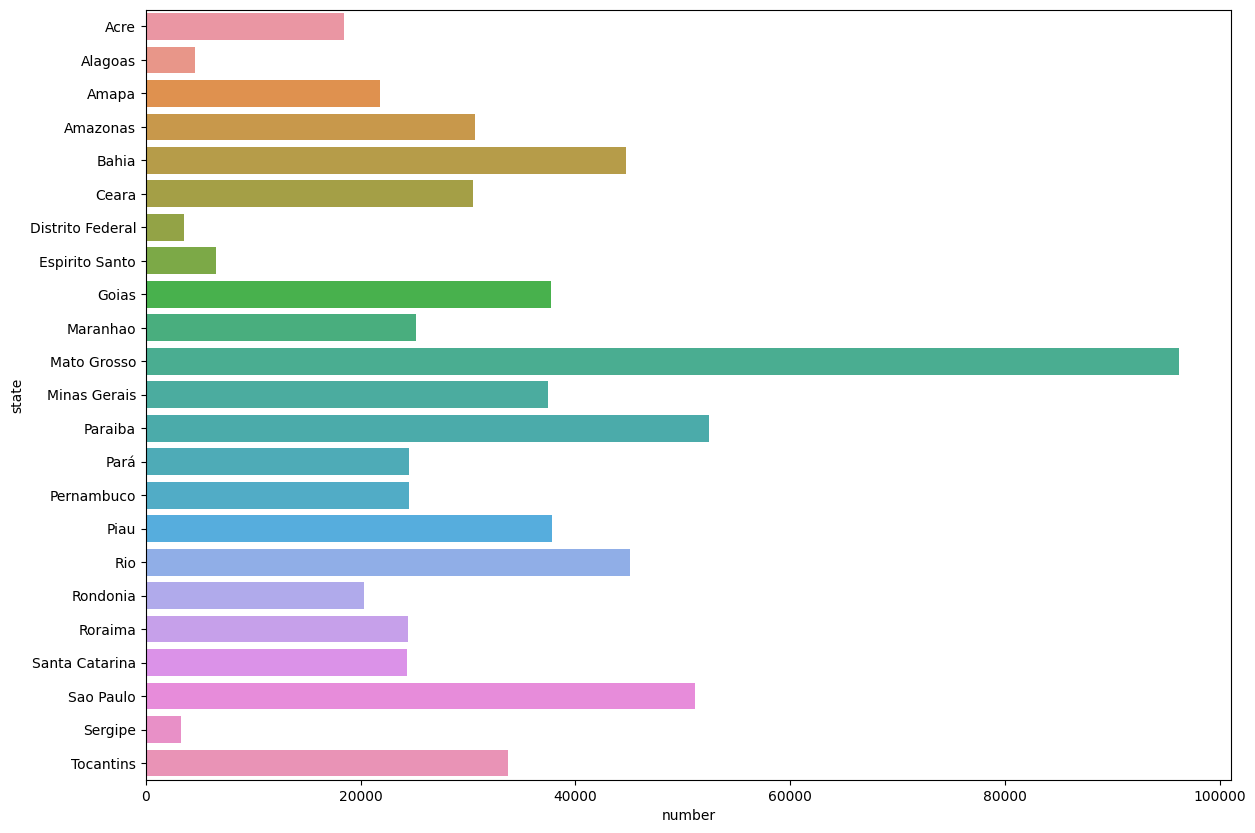

In [45]:
plt.figure(figsize=(14,10))
sns.barplot(x="number", y="state", data=max_ff_state)

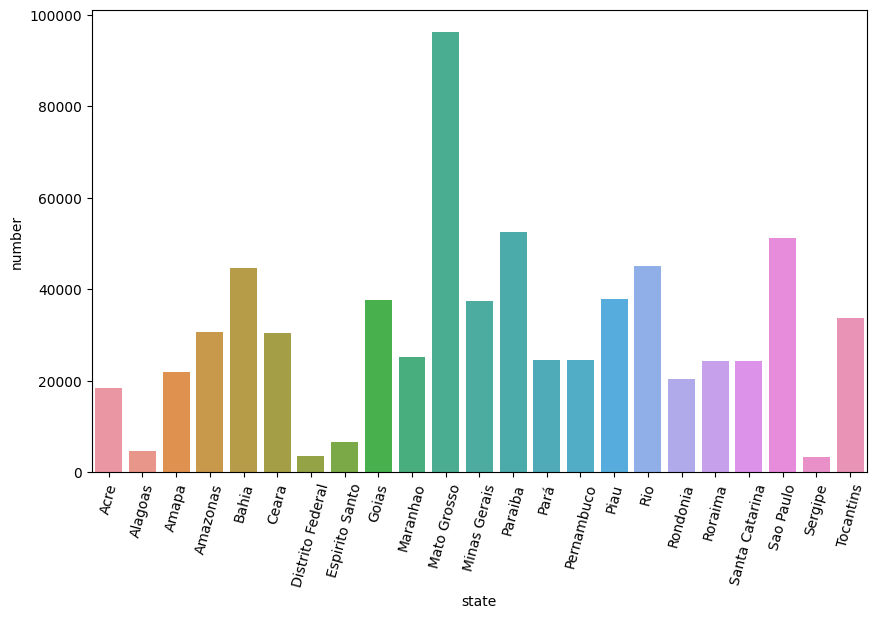

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x="state", y="number", data=max_ff_state)
plt.xticks(rotation=75)
plt.show()

## 13. Find Total Number of Fires Were Reported In Amazonas

In [49]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [61]:
df_amazon[df_amazon["state"] == "Amazonas"]["number"].sum()

30650.129

In [54]:
len(df_amazon[df_amazon["state"] == "Amazonas"])

239

In [57]:
df_amazon[df_amazon["state"] == "Amazonas"].count()

year         239
state        239
month        239
number       239
date         239
month_eng    239
dtype: int64

## 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [62]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [66]:
ff_amazonas = df_amazon[df_amazon["state"] == "Amazonas"]
ff_amazonas_year = ff_amazonas.groupby('year')['number'].sum().reset_index()

ff_amazonas_year

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

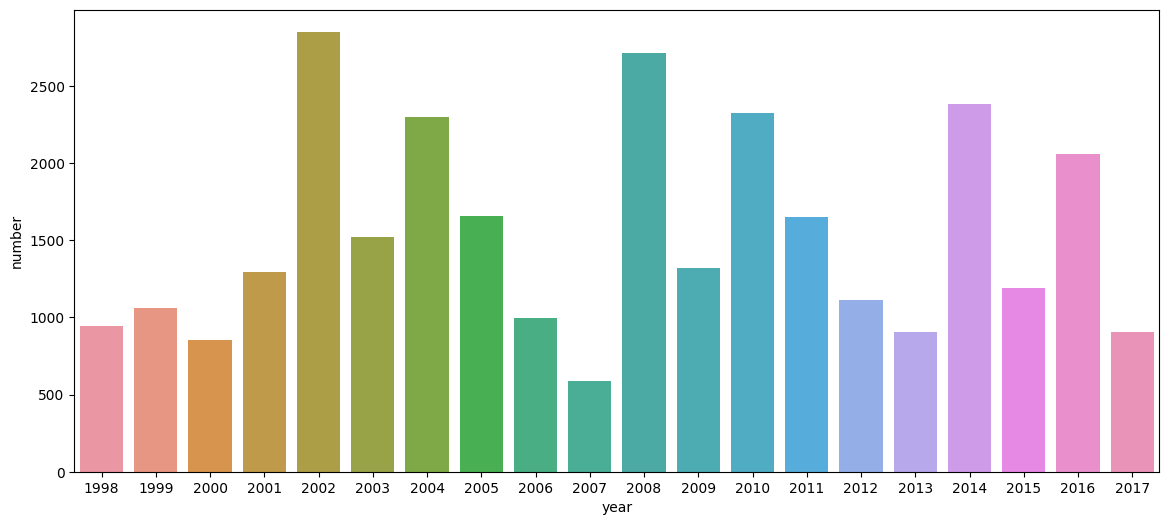

In [70]:
plt.figure(figsize=(14, 6))
sns.barplot(x="year", y="number", data=ff_amazonas_year)

## 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [71]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [72]:
## ff_amazonas = df_amazon[df_amazon["state"] == "Amazonas"]

In [75]:
ff_amazonas.head()

,year,state,month,number,date,month_eng
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan


In [78]:
# convert the date to datetime object first
# Convert the column to datetime objects
ff_amazonas['date_object'] = pd.to_datetime(ff_amazonas['date'])

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_53977/3715570301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_amazonas['date_object'] = pd.to_datetime(ff_amazonas['date'])


In [84]:
ff_amazonas.dtypes

year                    int64
state                  object
month                  object
number                float64
date           datetime64[ns]
month_eng              object
date_object    datetime64[ns]
dtype: object

In [80]:
ff_amazonas.head()

,year,state,month,number,date,month_eng,date_object
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan,1998-01-01
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan,1999-01-01
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan,2000-01-01
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan,2001-01-01
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan,2002-01-01


In [81]:
import calendar

In [86]:
day = ff_amazonas.groupby(ff_amazonas["date_object"].dt.dayofweek)["number"].sum()

day.index = [calendar.day_name[x] for x in range(0, 7)]

day = day.reset_index()

In [88]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


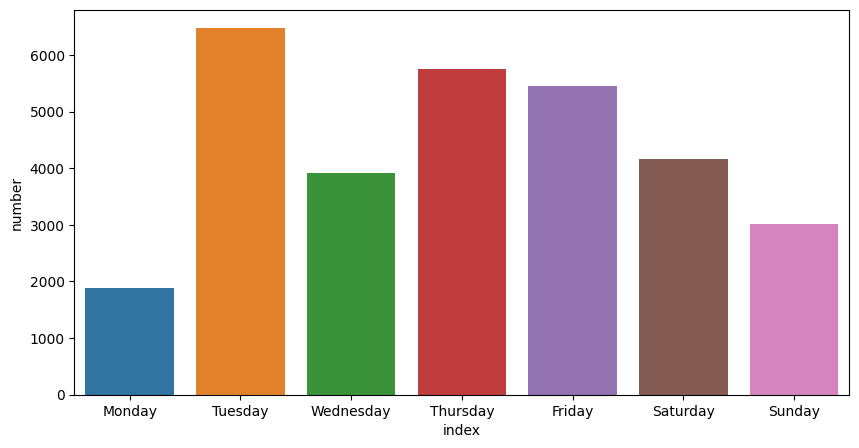

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(x="index", y="number", data=day)
plt.show()

## 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’

In [91]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [92]:
ff_2015_monthly = df_amazon[df_amazon["year"] == 2015].groupby("month_eng")["number"].sum().reset_index()

ff_2015_monthly

,month_eng,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<Axes: xlabel='month_eng', ylabel='number'>

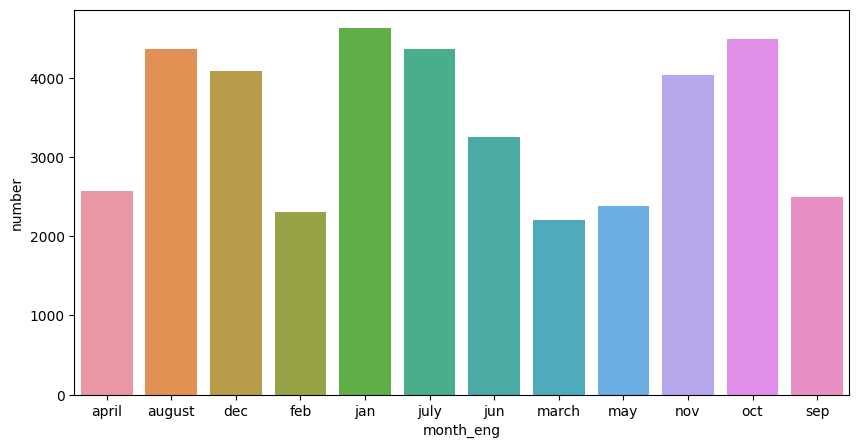

In [94]:
plt.figure(figsize=(10, 5))
sns.barplot(x="month_eng", y="number", data=ff_2015_monthly)

## 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [95]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [97]:
states_sorted = df_amazon.groupby("state")["number"].mean().sort_values(ascending=False)

In [99]:
states_sorted = states_sorted.reset_index()

states_sorted

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


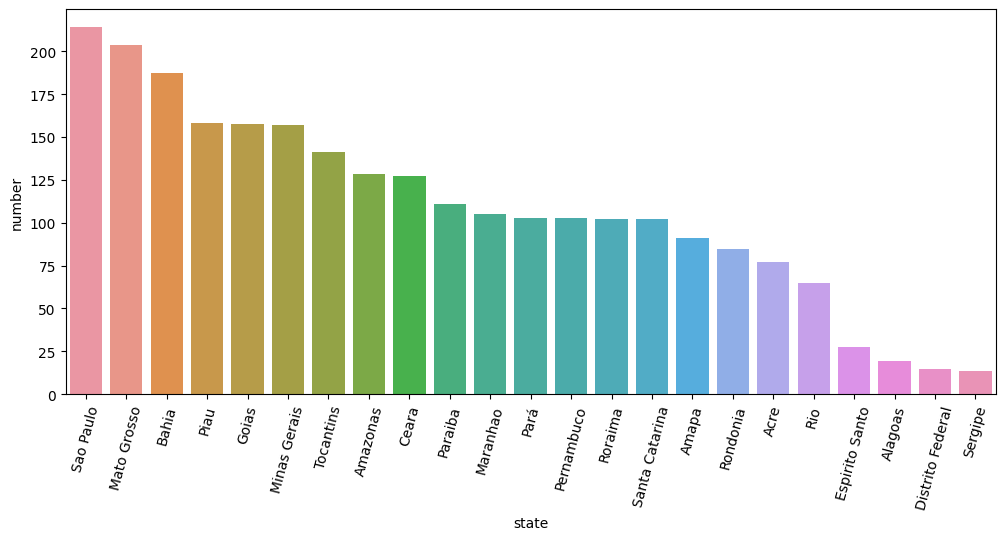

In [103]:
plt.figure(figsize=(12, 5))
sns.barplot(x="state", y="number", data=states_sorted)
plt.xticks(rotation=75)
plt.show()

## 18.  To Find The State Names Where Fires Were Reported In 'dec'

In [104]:
df_amazon.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_eng'], dtype='object')

In [108]:
df_amazon[df_amazon["month_eng"] == "dec"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)